In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('heart.xlsx')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.shape

(299, 13)

In [4]:
df.DEATH_EVENT.value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

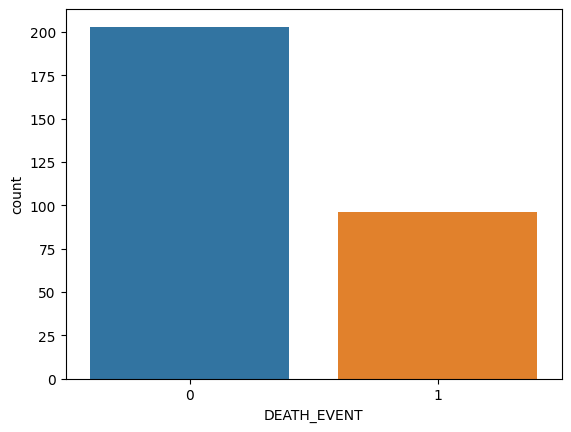

In [5]:
sns.countplot(x=df["DEATH_EVENT"])

<Axes: xlabel='diabetes', ylabel='count'>

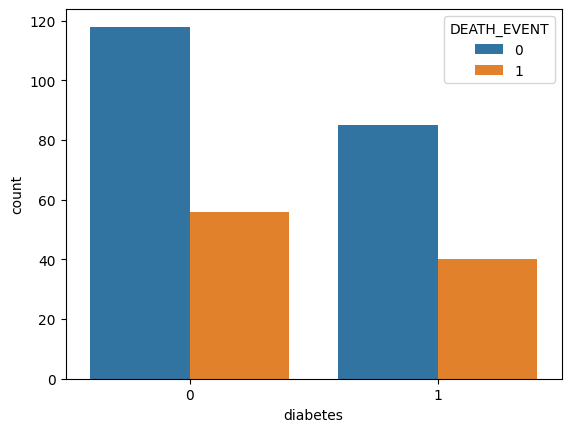

In [6]:
sns.countplot(x='diabetes',hue='DEATH_EVENT',data=df)

<Axes: xlabel='high_blood_pressure', ylabel='count'>

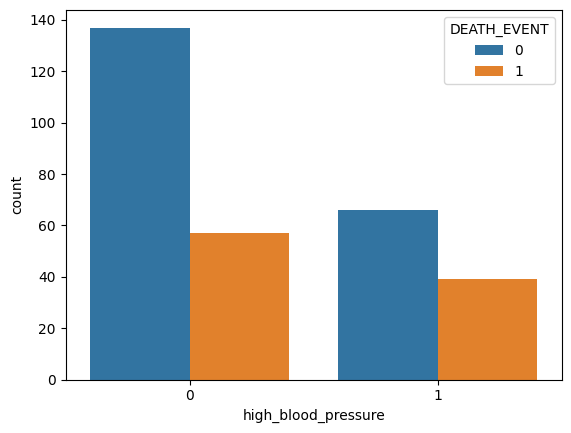

In [7]:
sns.countplot(x='high_blood_pressure',hue='DEATH_EVENT',data=df)

In [8]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<Axes: title={'center': 'Correlation for every column'}>

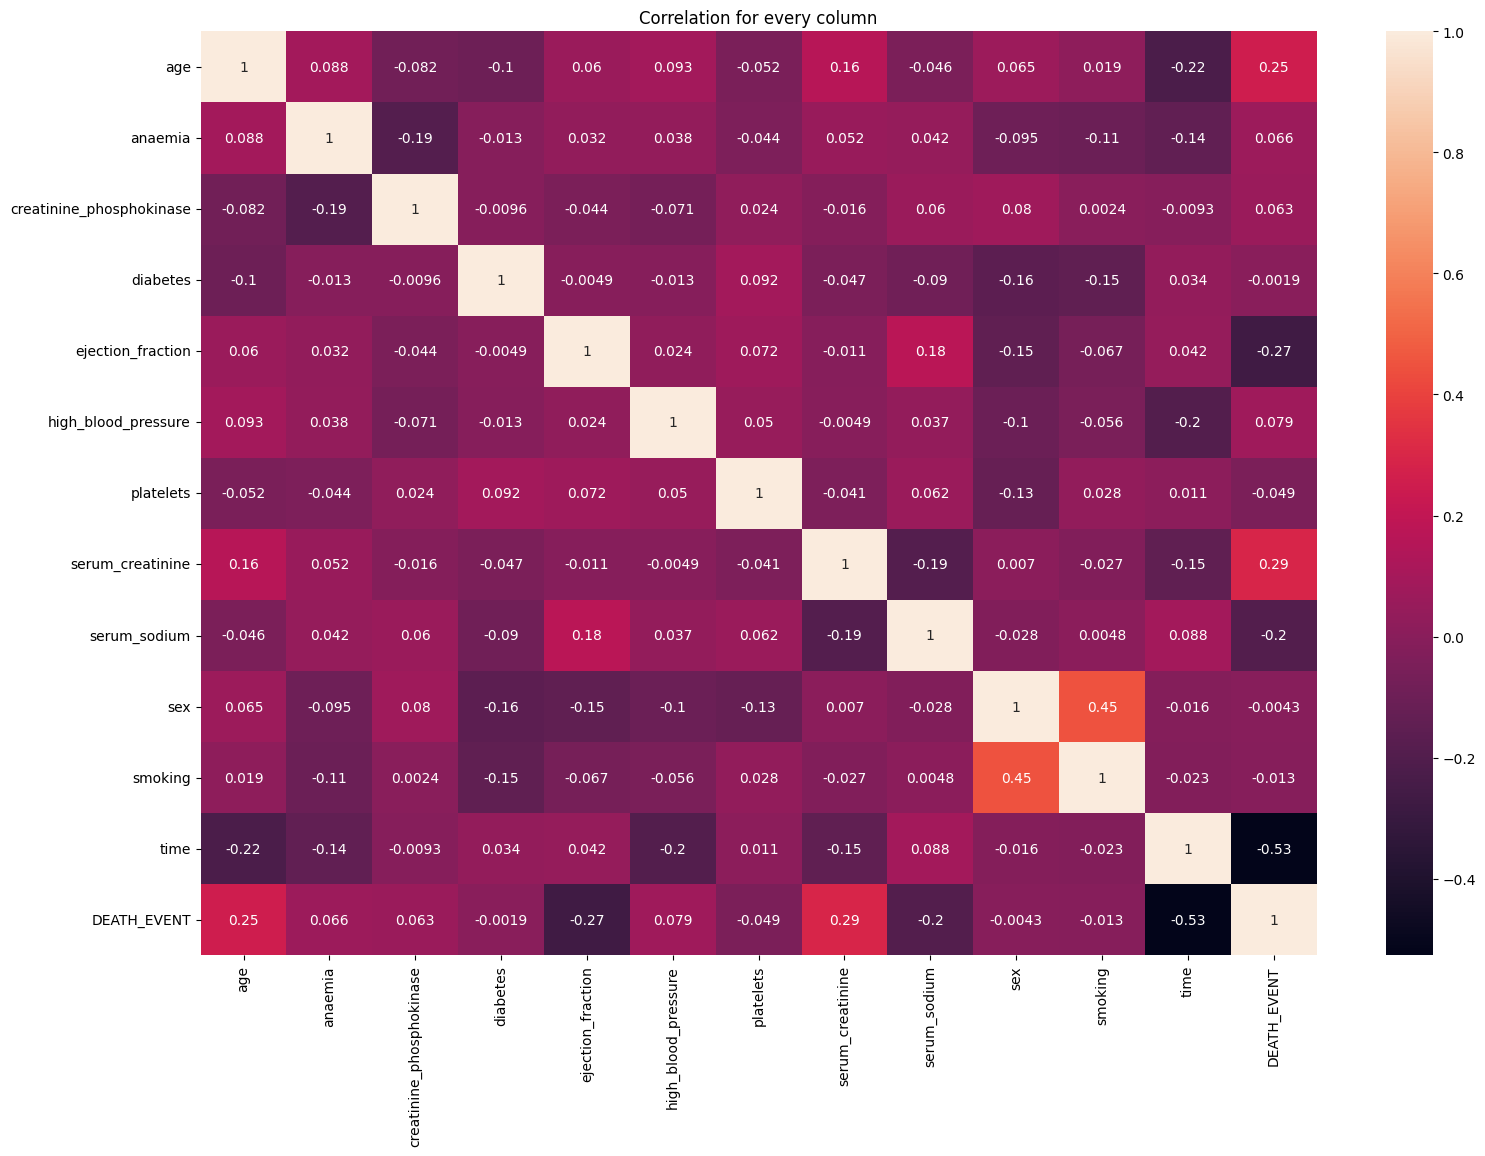

In [9]:
plt.figure(figsize=(18,12))
plt.title('Correlation for every column')
sns.heatmap(df.corr(),annot=True)

# Separete X,Y

In [10]:
x = df.drop('DEATH_EVENT',axis=1)

In [11]:
y = df[['DEATH_EVENT']]

In [12]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [13]:
y.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


In [14]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=42)

In [15]:
xtrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
224,58.0,0,582,1,25,0,504000.0,1.0,138,1,0,205
68,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66
222,42.0,1,86,0,35,0,365000.0,1.1,139,1,1,201
37,82.0,1,855,1,50,1,321000.0,1.0,145,0,0,30
16,87.0,1,149,0,38,0,262000.0,0.9,140,1,0,14


In [16]:
ytrain.head()

,DEATH_EVENT
224,0
68,1
222,0
37,1
16,1


In [17]:
dt = DecisionTreeClassifier()

In [18]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

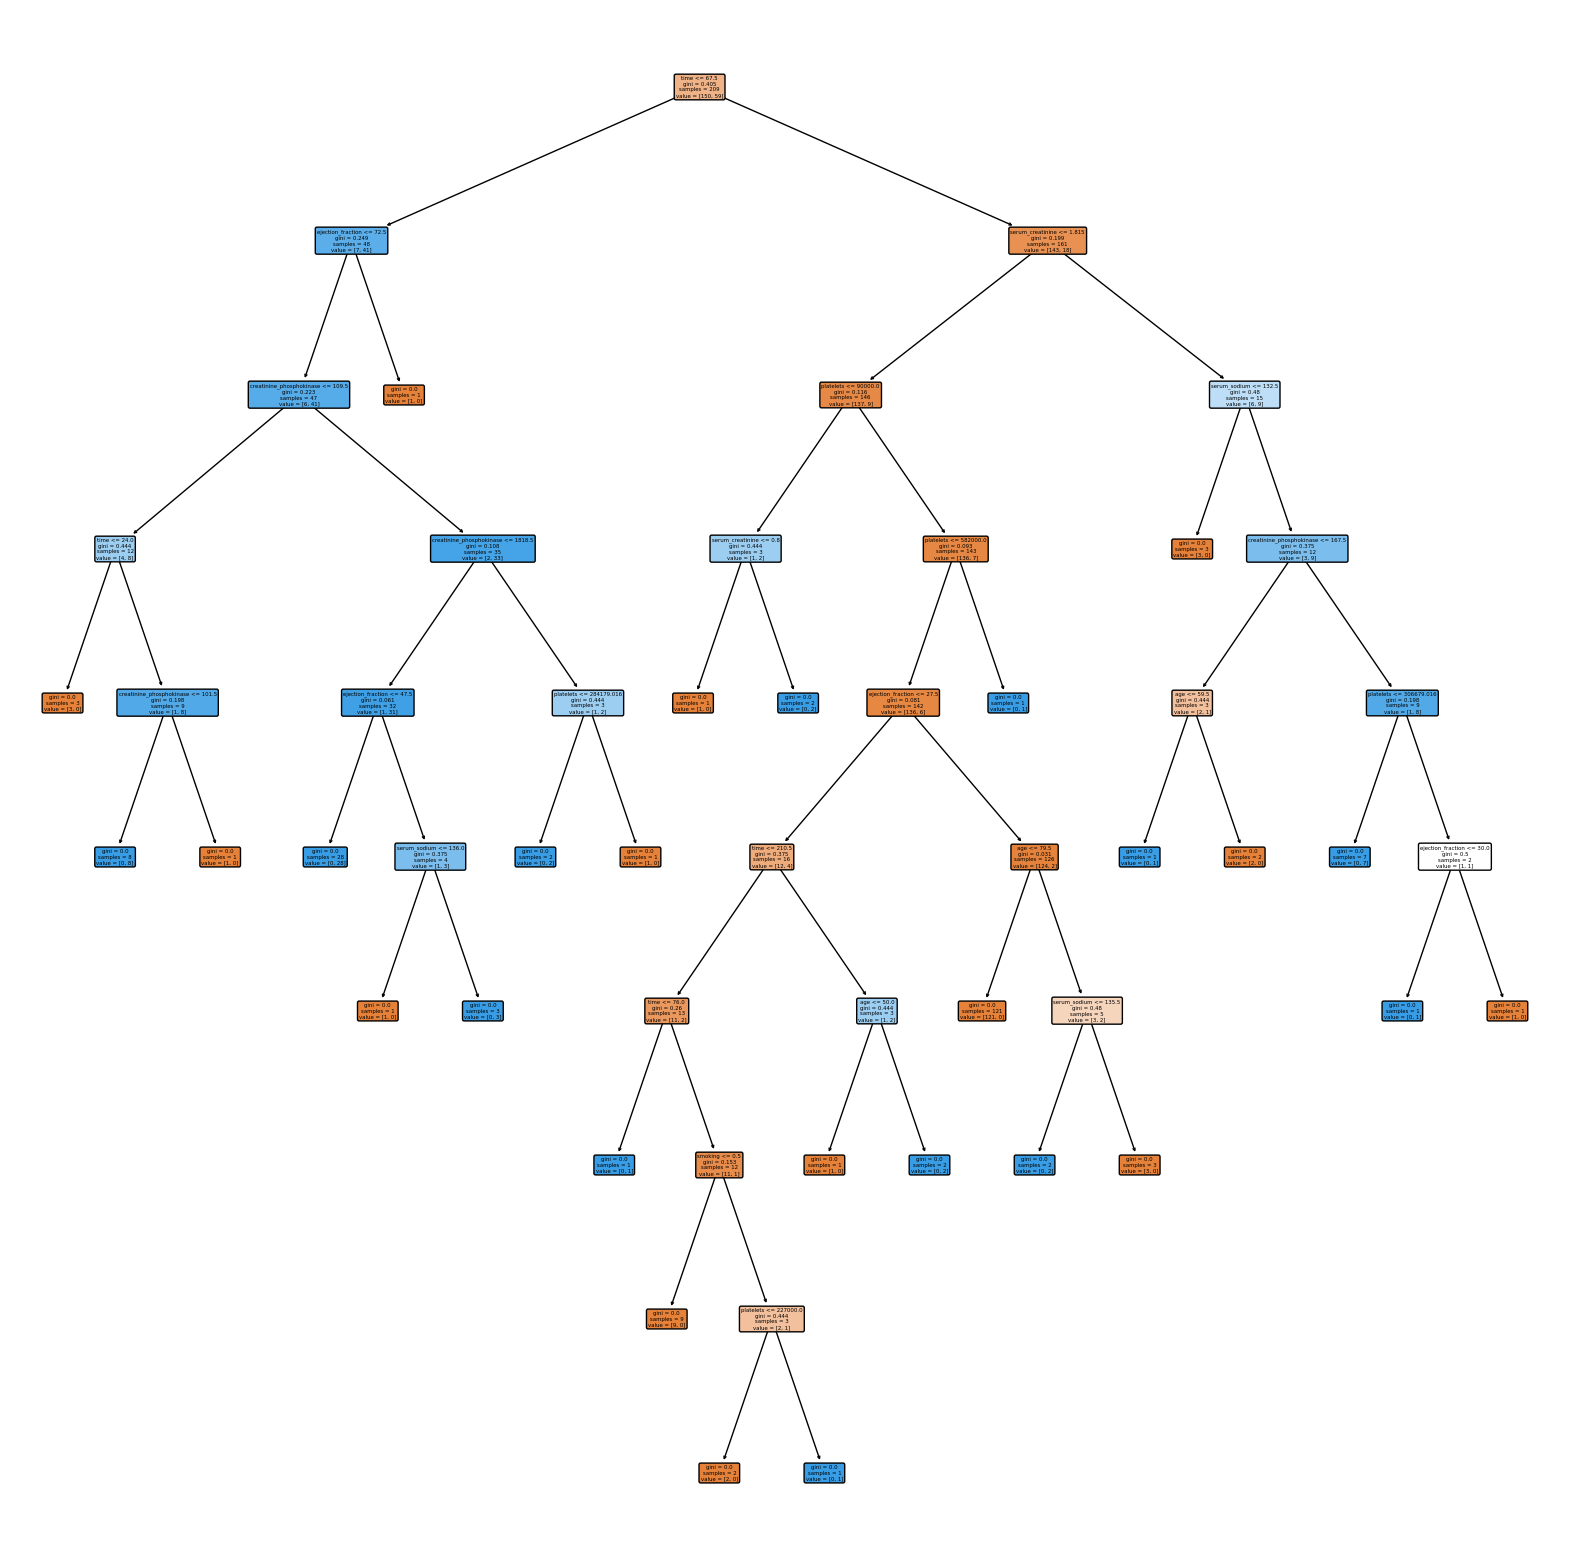

In [19]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt,filled =True ,rounded= True,feature_names =x.columns)
plt.savefig("tree.png",dpi=1200)

In [20]:
pred = dt.predict(xtest)
pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1], dtype=int64)

In [21]:
np.array(ytest)

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
    

# Confusion Matrix

In [22]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73        53
           1       0.61      0.46      0.52        37

    accuracy                           0.66        90
   macro avg       0.64      0.63      0.63        90
weighted avg       0.65      0.66      0.65        90



In [23]:
cm = confusion_matrix(ytest,pred)
cm

array([[42, 11],
       [20, 17]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual Values')

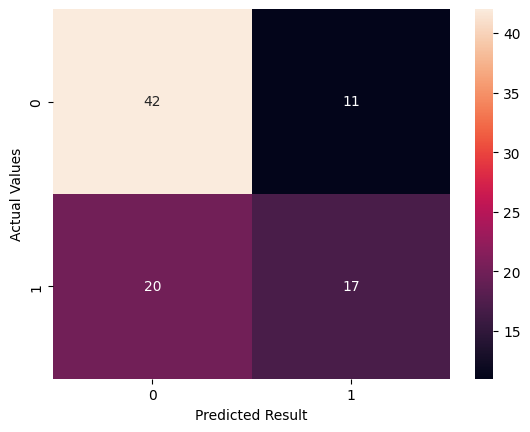

In [24]:
#using heatmap
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Result')
plt.ylabel('Actual Values')

In [25]:
tp,fn,fp,tn= confusion_matrix(ytest,pred).reshape(-1)

In [26]:
print(tp,fn,fp,tn)

42 11 20 17


# Accuracy

In [27]:
accuracy =(tp+tn)/(tn+fn+tp+fp)
accuracy

0.6555555555555556

In [28]:
precision = tp/(tp+fp)
precision

0.6774193548387096

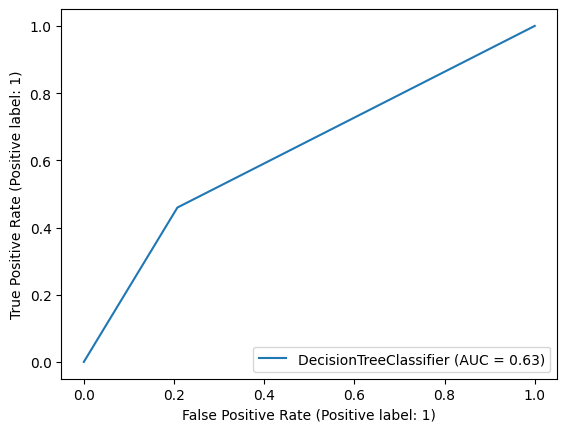

In [29]:
from sklearn.metrics import RocCurveDisplay
disp = RocCurveDisplay.from_estimator(dt,xtest,ytest)
disp

In [30]:
accuracy_score(ytest,pred)

0.6555555555555556

In [31]:
dt.score(xtest,ytest)

0.6555555555555556

# Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf = RandomForestClassifier()

In [34]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [35]:
rf.score(xtest,ytest)

0.7666666666666667

# Random Search CV

In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
#tree define
tree = np.random.randint(15,150,30) # Generate 30 tree among 15-150

In [38]:
print(tree)

[ 21 127  34  44  35  82  81  43 148 143 103  59 106 125  57 126  90 138
 120  29 107 117 140  92  18  78  36  84  99 119]


In [39]:
max_features = ['sqrt','log2']
max_depth = np.random.randint(2,12,50)
criterion = ['gini','entropy']
min_samples_split = [2,3,4] 
#grid is like a dictionary
grid = {
    'n_estimators' : tree,#number of tree
    'criterion' : criterion,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split
}

In [40]:
print(grid)

{'n_estimators': array([ 21, 127,  34,  44,  35,  82,  81,  43, 148, 143, 103,  59, 106,
       125,  57, 126,  90, 138, 120,  29, 107, 117, 140,  92,  18,  78,
        36,  84,  99, 119]), 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2'], 'max_depth': array([ 9,  5,  7,  5,  6, 10,  6,  4,  6, 10,  3, 11,  8,  4,  4,  8,  8,
        5,  7,  3, 10, 10,  3,  7,  8,  2,  7,  2,  4,  6,  8,  5,  4,  8,
       11,  8,  2,  8,  6, 10,  8,  8,  8, 10,  5,  9,  5,  8,  8, 11]), 'min_samples_split': [2, 3, 4]}


In [41]:
rcv = RandomizedSearchCV(rf,grid,n_iter=100,cv=3) #cv = cross validation

In [42]:
rcv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 9,  5,  7,  5,  6, 10,  6,  4,  6, 10,  3, 11,  8,  4,  4,  8,  8,
        5,  7,  3, 10, 10,  3,  7,  8,  2,  7,  2,  4,  6,  8,  5,  4,  8,
       11,  8,  2,  8,  6, 10,  8,  8,  8, 10,  5,  9,  5,  8,  8, 11]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': array([ 21, 127,  34,  44,  35,  82,  81,  43, 148, 143, 103,  59, 106,
       125,  57, 126,  90, 138, 120,  29, 107, 117, 140,  92,  18,  78,
        36,  84,  99, 119])})

In [43]:
rcv.cv_results_ #result

{'mean_fit_time': array([0.08176017, 0.2901934 , 0.51681145, 0.38521051, 0.38945134,
        0.45834263, 0.38587546, 0.36469165, 0.20316013, 0.08332038,
        0.297189  , 0.28657707, 0.30262256, 0.32367619, 0.40673939,
        0.4433225 , 0.06733775, 0.5053161 , 0.16159503, 0.1201632 ,
        0.45057456, 0.39739847, 0.15625882, 0.40132268, 0.13552936,
        0.36185161, 0.15646418, 0.1147449 , 0.12513065, 0.21304965,
        0.33909257, 0.12514043, 0.2812144 , 0.5199585 , 0.17714834,
        0.37096572, 0.43913078, 0.16554586, 0.34649221, 0.06869348,
        0.11978507, 0.42348051, 0.21153394, 0.13067174, 0.5573473 ,
        0.10937134, 0.07050649, 0.0712506 , 0.27121433, 0.34395885,
        0.41151961, 0.42720079, 0.4999613 , 0.41689968, 0.34422676,
        0.27607266, 0.369742  , 0.07293463, 0.20321814, 0.48474924,
        0.37019928, 0.2712605 , 0.12509362, 0.13069232, 0.35352286,
        0.51390791, 0.16143839, 0.13037133, 0.50558074, 0.16162284,
        0.29182283, 0.15639544,

In [44]:
tuning_result = pd.DataFrame(rcv.cv_results_)
tuning_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.081760,0.005160,0.020831,0.007358,21,2,sqrt,5,entropy,"{'n_estimators': 21, 'min_samples_split': 2, '...",0.842857,0.914286,0.797101,0.851415,0.048221,94
1,0.290193,0.006525,0.031503,0.000359,81,3,log2,3,entropy,"{'n_estimators': 81, 'min_samples_split': 3, '...",0.814286,0.942857,0.855072,0.870738,0.053645,32
2,0.516811,0.001066,0.041637,0.007390,148,2,sqrt,4,entropy,"{'n_estimators': 148, 'min_samples_split': 2, ...",0.814286,0.957143,0.826087,0.865839,0.064741,66
3,0.385211,0.014146,0.037217,0.006893,107,4,sqrt,8,entropy,"{'n_estimators': 107, 'min_samples_split': 4, ...",0.800000,0.957143,0.855072,0.870738,0.065103,32
4,0.389451,0.023968,0.036325,0.007504,106,2,sqrt,7,gini,"{'n_estimators': 106, 'min_samples_split': 2, ...",0.814286,0.928571,0.840580,0.861146,0.048871,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.356736,0.015407,0.031865,0.005330,92,3,sqrt,3,entropy,"{'n_estimators': 92, 'min_samples_split': 3, '...",0.828571,0.957143,0.855072,0.880262,0.055429,9
96,0.306372,0.018135,0.030433,0.001202,81,2,sqrt,7,gini,"{'n_estimators': 81, 'min_samples_split': 2, '...",0.800000,0.928571,0.826087,0.851553,0.055492,91
97,0.357696,0.022715,0.033345,0.002513,99,2,sqrt,5,gini,"{'n_estimators': 99, 'min_samples_split': 2, '...",0.814286,0.942857,0.840580,0.865908,0.055460,58
98,0.449540,0.003590,0.034294,0.003844,127,2,log2,6,gini,"{'n_estimators': 127, 'min_samples_split': 2, ...",0.800000,0.942857,0.855072,0.865977,0.058829,52


In [45]:
rcv_accuracy = rcv.best_score_
rcv_accuracy

0.8850931677018633

In [46]:
best_parameters = rcv.best_params_
best_parameters 

{'n_estimators': 43,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': 5,
 'criterion': 'gini'}

In [47]:
rcv1 = rcv.best_estimator_

In [48]:
rcv1

RandomForestClassifier(max_depth=5, n_estimators=43)

In [49]:
rcv1.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=5, n_estimators=43)

In [50]:
rcv1_accuracy = rcv1.score(xtest,ytest)
rcv1_accuracy

0.7777777777777778

In [51]:
rcv1.base_estimator_

DecisionTreeClassifier()

In [52]:
rf.fit

<bound method BaseForest.fit of RandomForestClassifier()>

In [53]:
rcv1.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=5, n_estimators=43)

In [54]:
rcv1_accuracy = rcv1.score(xtest,ytest)
rcv1_accuracy

0.7555555555555555

In [55]:
rcv1.base_estimator_

DecisionTreeClassifier()

# GridSearchCV

In [56]:
df_g = pd.read_excel('heart.xlsx')

In [57]:
x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [58]:
y

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1
...,...
294,0
295,0
296,0
297,0


In [59]:
from sklearn.model_selection import GridSearchCV
x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.3,random_state = 42)

In [60]:
grid ={
    'max_depth': list(range(10,25)),
    'max_features': list(range(0,14))
}

In [61]:
gsc = GridSearchCV(rf,grid,cv=3)

In [62]:
gsc.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                       20, 21, 22, 23, 24],
                         'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13]})

In [63]:
print('Best parameters',gsc.best_params_,'Accuracy',gsc.best_score_)

Best parameters {'max_depth': 11, 'max_features': 2} Accuracy 0.8897860593512767


In [64]:
gsc1 = gsc.best_estimator_
gsc1

RandomForestClassifier(max_depth=11, max_features=2)

In [65]:
gsc1.fit(x_train,y_train)

RandomForestClassifier(max_depth=11, max_features=2)

In [66]:
gsc.score(x_test,y_test)

0.7666666666666667

In [67]:
gsc1.base_estimator_

DecisionTreeClassifier()